In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("Downloads/cv-valid-train.csv/cv-valid-train.csv") 
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN


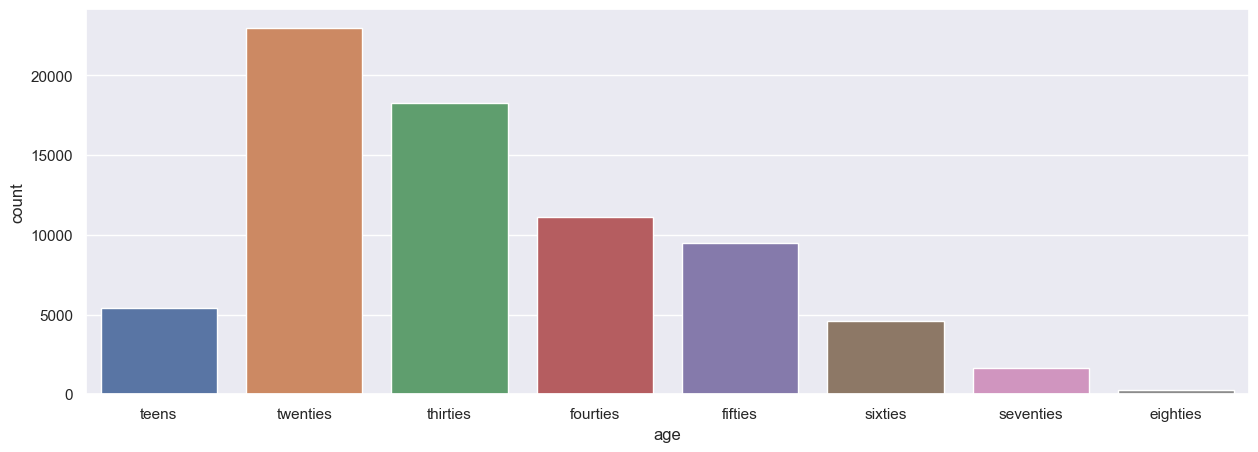

In [2]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=df[df['age'].notna()], 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

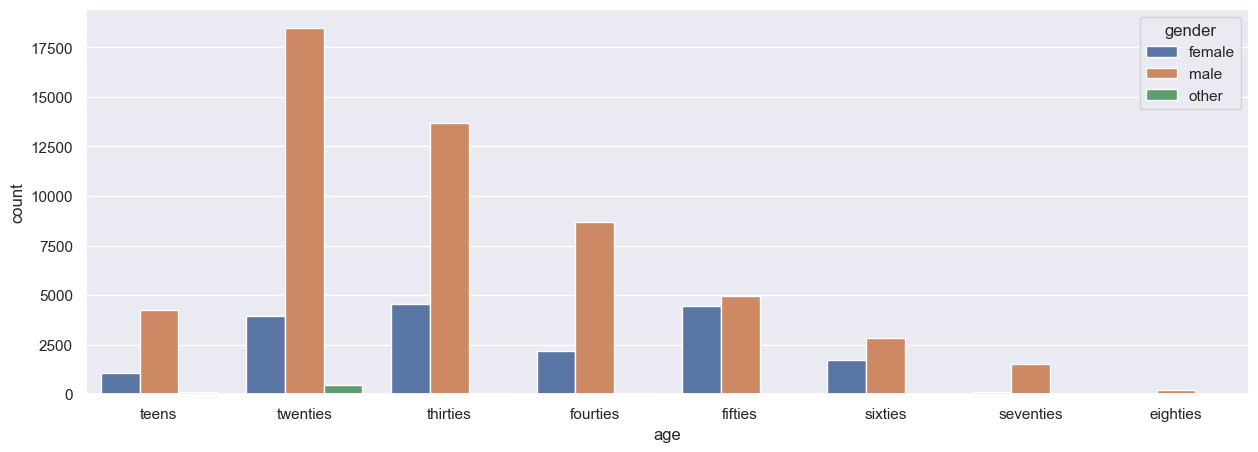

In [3]:
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

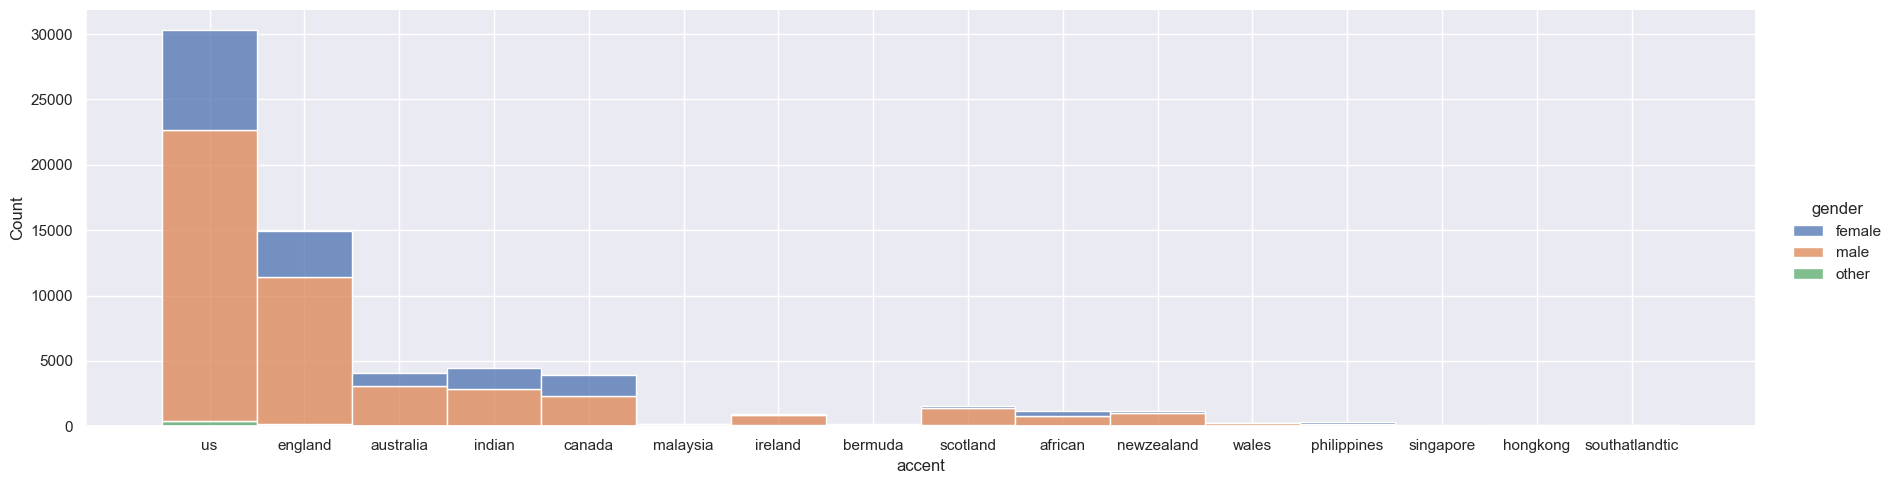

In [4]:
sns.displot(x="accent", 
        data=df[df['accent'].notna()], 
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

initial: (195776, 8) final: (63163, 8)


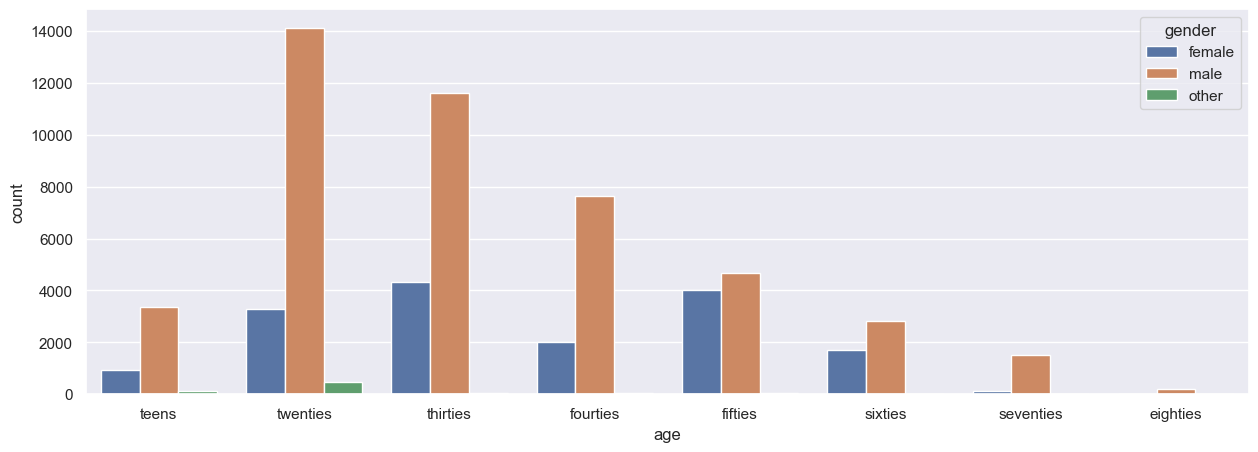

In [5]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

initial: (195776, 8) final: (63163, 8)


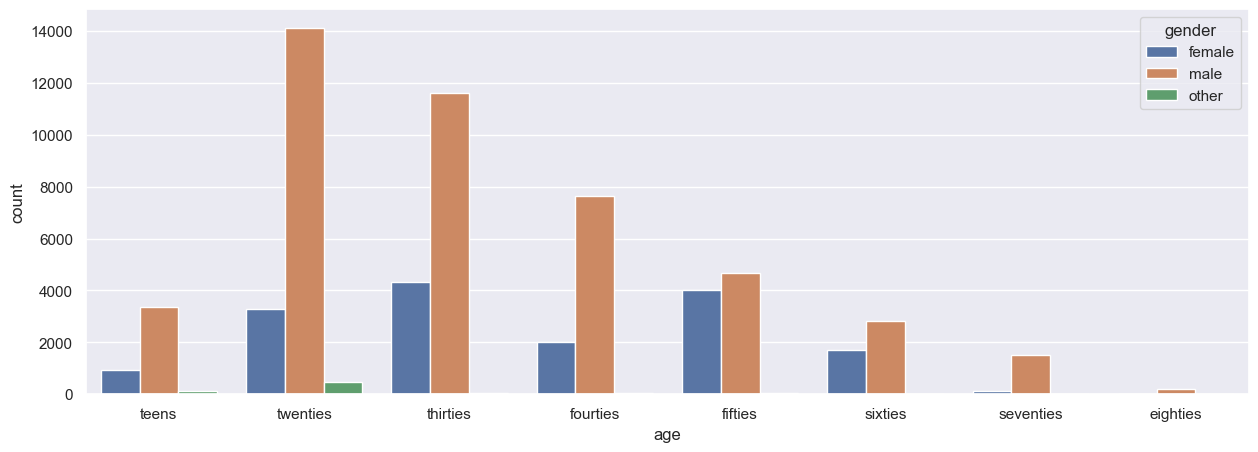

In [6]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

In [7]:
#we extract the columns that we think useful are
df = df[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,female
1,cv-valid-train/sample-000008.mp3,seventies,male
2,cv-valid-train/sample-000013.mp3,thirties,female
3,cv-valid-train/sample-000014.mp3,sixties,male
4,cv-valid-train/sample-000019.mp3,fifties,male


In [8]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,0.0
1,cv-valid-train/sample-000008.mp3,seventies,1.0
2,cv-valid-train/sample-000013.mp3,thirties,0.0
3,cv-valid-train/sample-000014.mp3,sixties,1.0
4,cv-valid-train/sample-000019.mp3,fifties,1.0


In [9]:
data[data['gender']==0.5].head()

,filename,age,gender
226,cv-valid-train/sample-000639.mp3,twenties,0.5
359,cv-valid-train/sample-001011.mp3,teens,0.5
463,cv-valid-train/sample-001297.mp3,twenties,0.5
478,cv-valid-train/sample-001325.mp3,twenties,0.5
543,cv-valid-train/sample-001477.mp3,twenties,0.5


In [10]:
data.drop(data[data['gender']==0.5].index,inplace=True)

In [11]:
data.head(228)

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,0.0
1,cv-valid-train/sample-000008.mp3,seventies,1.0
2,cv-valid-train/sample-000013.mp3,thirties,0.0
3,cv-valid-train/sample-000014.mp3,sixties,1.0
4,cv-valid-train/sample-000019.mp3,fifties,1.0
...,...,...,...
223,cv-valid-train/sample-000633.mp3,twenties,1.0
224,cv-valid-train/sample-000635.mp3,fourties,1.0
225,cv-valid-train/sample-000637.mp3,twenties,1.0
227,cv-valid-train/sample-000645.mp3,fourties,0.0


In [12]:
data.reset_index(drop=True,inplace=True)

In [13]:
data.head(228)

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,0.0
1,cv-valid-train/sample-000008.mp3,seventies,1.0
2,cv-valid-train/sample-000013.mp3,thirties,0.0
3,cv-valid-train/sample-000014.mp3,sixties,1.0
4,cv-valid-train/sample-000019.mp3,fifties,1.0
...,...,...,...
223,cv-valid-train/sample-000633.mp3,twenties,1.0
224,cv-valid-train/sample-000635.mp3,fourties,1.0
225,cv-valid-train/sample-000637.mp3,twenties,1.0
226,cv-valid-train/sample-000645.mp3,fourties,0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72692 entries, 0 to 72691
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  72692 non-null  object 
 1   age       72692 non-null  object 
 2   gender    72692 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [18]:
import librosa
ds_path = "Videos/Common_voie_dataset/"

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    gender = data[data['filename'] == filename].gender.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(data.iloc[0]['filename'])
print("features: ", features)

features:  [0.0, 2147.6058803589067, 2430.474971192408, 4428.830553016453, -625.28143, 111.306145, 6.3690844, 34.7671, 31.623457, -4.721564, -0.5119338, -4.9454904, -12.71285, -2.0436711, -3.7277248, -10.708405, -11.206564, -12.003516, -8.506437, -5.472296, -4.950396, -3.7100523, -6.3149858, -6.3280854]


In [22]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 1000
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["gender", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data)
df_features.head()

999/72691

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.0,2147.605880,2430.474971,4428.830553,-625.281433,111.306145,6.369084,34.767101,31.623457,-4.721564,...,-10.708405,-11.206564,-12.003516,-8.506437,-5.472296,-4.950396,-3.710052,-6.314986,-6.328085,twenties
1,1.0,2815.325440,2451.922347,4884.633819,-469.936646,126.283386,-16.548649,3.546792,2.184188,13.748076,...,-10.987889,1.132519,6.090083,-1.732454,-1.226424,-6.432128,-7.269326,-4.796600,-3.129156,seventies
2,0.0,1844.637736,1491.011525,3164.948048,-418.205475,147.666870,-49.974003,-2.286364,37.185310,-8.906048,...,-13.844884,-9.928527,-7.873624,-5.476490,-2.298846,-6.556987,-5.206552,-0.403855,-3.877070,thirties
3,1.0,2123.711334,2202.012929,4111.215965,-464.910706,118.437225,19.749662,27.143229,26.438824,2.309232,...,-5.461425,-2.908412,-4.496074,-2.716447,-0.080573,-5.294940,-5.868721,0.600507,-3.375832,sixties
4,1.0,2360.672043,2957.220239,4767.080050,-343.833008,157.153885,7.661150,41.898964,-15.152472,28.925106,...,0.102648,6.319802,-1.603871,3.837120,-2.643298,2.323318,-1.382684,3.791498,-3.534383,fifties


In [23]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column
        
    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [24]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])

Before scaling: [0.0 2147.6058803589067 2430.474971192408 4428.830553016453 -625.28143
 111.306145 6.3690844 34.7671 31.623457 -4.721564 -0.5119338 -4.9454904
 -12.71285 -2.0436711 -3.7277248 -10.708405 -11.206564 -12.003516
 -8.506437 -5.472296 -4.950396 -3.7100523 -6.3149858 -6.3280854]

After scaling: [-1.82455593 -0.65129944 -0.1114996  -0.38658583 -1.97072085 -0.24801522
  0.50977671  0.7642627   1.58879671 -0.82619972  0.12877929 -0.33032539
 -1.07246411  0.41148945 -0.06267565 -1.21327867 -1.77448771 -1.37097303
 -1.17564893 -0.64927985 -0.3415679  -0.50977475 -1.07843911 -0.63217852]


In [25]:
df_features['label'].unique()

array(['twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


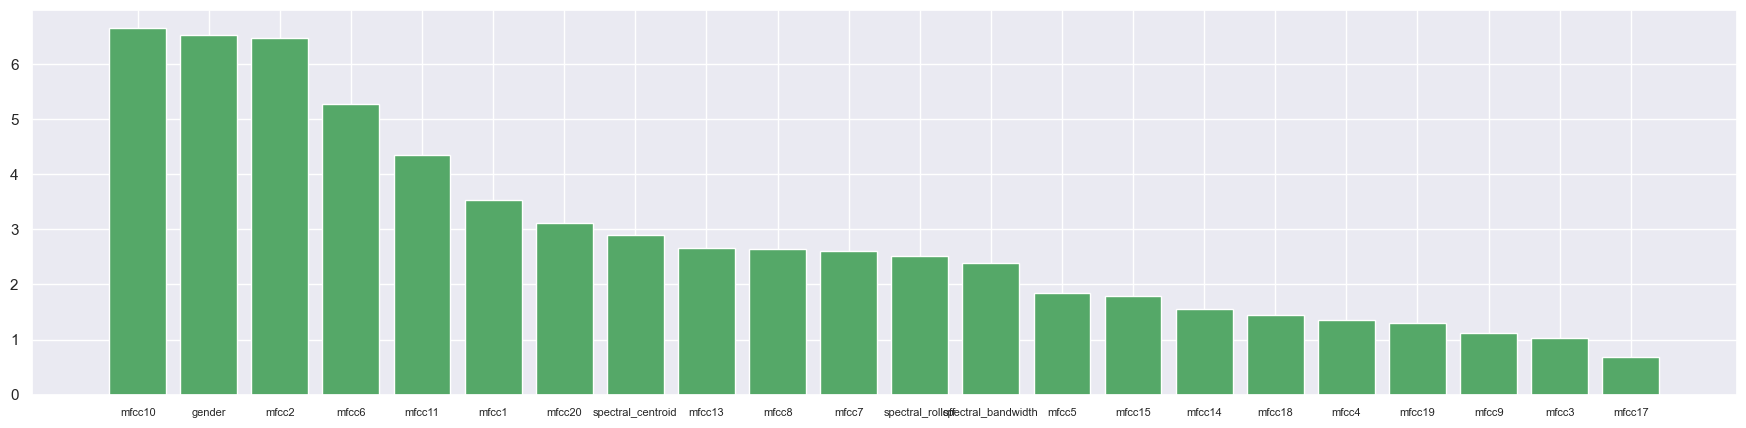

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

In [28]:
df_features.head()

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.0,2147.605880,2430.474971,4428.830553,-625.281433,111.306145,6.369084,34.767101,31.623457,-4.721564,...,-10.708405,-11.206564,-12.003516,-8.506437,-5.472296,-4.950396,-3.710052,-6.314986,-6.328085,twenties
1,1.0,2815.325440,2451.922347,4884.633819,-469.936646,126.283386,-16.548649,3.546792,2.184188,13.748076,...,-10.987889,1.132519,6.090083,-1.732454,-1.226424,-6.432128,-7.269326,-4.796600,-3.129156,seventies
2,0.0,1844.637736,1491.011525,3164.948048,-418.205475,147.666870,-49.974003,-2.286364,37.185310,-8.906048,...,-13.844884,-9.928527,-7.873624,-5.476490,-2.298846,-6.556987,-5.206552,-0.403855,-3.877070,thirties
3,1.0,2123.711334,2202.012929,4111.215965,-464.910706,118.437225,19.749662,27.143229,26.438824,2.309232,...,-5.461425,-2.908412,-4.496074,-2.716447,-0.080573,-5.294940,-5.868721,0.600507,-3.375832,sixties
4,1.0,2360.672043,2957.220239,4767.080050,-343.833008,157.153885,7.661150,41.898964,-15.152472,28.925106,...,0.102648,6.319802,-1.603871,3.837120,-2.643298,2.323318,-1.382684,3.791498,-3.534383,fifties


In [29]:
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,0.0
1,cv-valid-train/sample-000008.mp3,seventies,1.0
2,cv-valid-train/sample-000013.mp3,thirties,0.0
3,cv-valid-train/sample-000014.mp3,sixties,1.0
4,cv-valid-train/sample-000019.mp3,fifties,1.0


In [30]:
data['filename'][0]

'cv-valid-train/sample-000005.mp3'

In [31]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

In [33]:
data['filename'][0]

'cv-valid-train/sample-000005.mp3'

In [35]:
import os
os.makedirs('Videos/Spectrogram')

In [40]:
create_spectrogram('Videos/Common_voie_dataset/'+data['filename'][0], 'Videos/Spectrogram/'+data['filename'][0].split('.')[0]+'.png')

In [41]:
len(data['filename'][3])

32

In [44]:
j=0
for i in data['filename']:
    create_spectrogram('Videos/Common_voie_dataset/'+i,'Videos/Spectrogram/'+i.split('.')[0]+'.png')
    print('Videos/Spectrogram/'+i.split('.')[0]+'.png')
    
    if j==999:
        break
    j=j+1

Videos/Spectrogram/cv-valid-train/sample-000005.png
Videos/Spectrogram/cv-valid-train/sample-000008.png
Videos/Spectrogram/cv-valid-train/sample-000013.png
Videos/Spectrogram/cv-valid-train/sample-000014.png
Videos/Spectrogram/cv-valid-train/sample-000019.png
Videos/Spectrogram/cv-valid-train/sample-000020.png
Videos/Spectrogram/cv-valid-train/sample-000023.png
Videos/Spectrogram/cv-valid-train/sample-000026.png
Videos/Spectrogram/cv-valid-train/sample-000027.png
Videos/Spectrogram/cv-valid-train/sample-000029.png
Videos/Spectrogram/cv-valid-train/sample-000034.png
Videos/Spectrogram/cv-valid-train/sample-000036.png
Videos/Spectrogram/cv-valid-train/sample-000039.png
Videos/Spectrogram/cv-valid-train/sample-000043.png
Videos/Spectrogram/cv-valid-train/sample-000044.png
Videos/Spectrogram/cv-valid-train/sample-000047.png
Videos/Spectrogram/cv-valid-train/sample-000049.png
Videos/Spectrogram/cv-valid-train/sample-000050.png
Videos/Spectrogram/cv-valid-train/sample-000051.png
Videos/Spect

In [45]:
data['image_file'] = data['filename'].apply(lambda x: x.split('.')[0]+'.png')

In [46]:
data.head()

,filename,age,gender,image_file
0,cv-valid-train/sample-000005.mp3,twenties,0.0,cv-valid-train/sample-000005.png
1,cv-valid-train/sample-000008.mp3,seventies,1.0,cv-valid-train/sample-000008.png
2,cv-valid-train/sample-000013.mp3,thirties,0.0,cv-valid-train/sample-000013.png
3,cv-valid-train/sample-000014.mp3,sixties,1.0,cv-valid-train/sample-000014.png
4,cv-valid-train/sample-000019.mp3,fifties,1.0,cv-valid-train/sample-000019.png


In [47]:
data[data['gender']==0.5]

,filename,age,gender,image_file


In [55]:
import os
fldr = 'Videos/Spectrogram/cv-valid-train'
files = os.listdir(fldr)

In [56]:
files

['sample-000005.png',
 'sample-000008.png',
 'sample-000013.png',
 'sample-000014.png',
 'sample-000019.png',
 'sample-000020.png',
 'sample-000023.png',
 'sample-000026.png',
 'sample-000027.png',
 'sample-000029.png',
 'sample-000034.png',
 'sample-000036.png',
 'sample-000039.png',
 'sample-000043.png',
 'sample-000044.png',
 'sample-000047.png',
 'sample-000049.png',
 'sample-000050.png',
 'sample-000051.png',
 'sample-000053.png',
 'sample-000054.png',
 'sample-000056.png',
 'sample-000057.png',
 'sample-000059.png',
 'sample-000062.png',
 'sample-000065.png',
 'sample-000068.png',
 'sample-000072.png',
 'sample-000073.png',
 'sample-000077.png',
 'sample-000081.png',
 'sample-000082.png',
 'sample-000088.png',
 'sample-000092.png',
 'sample-000097.png',
 'sample-000100.png',
 'sample-000101.png',
 'sample-000105.png',
 'sample-000106.png',
 'sample-000111.png',
 'sample-000115.png',
 'sample-000116.png',
 'sample-000118.png',
 'sample-000121.png',
 'sample-000124.png',
 'sample-0

In [57]:
lst = []
for i in range(len(files)):
    # Split the filename into base name and extension
   # base_name, ext = os.path.splitext(files[i])
    # If the extension is not already .png, change it
    #if ext == '.png':
        # Reconstruct the filename with the .png extension
        #files[i] = base_name + '.png'
        lst.append(files[i])
        #print(files[i])
lst.sort()

In [58]:
len(files)

1000

In [59]:
lst

['sample-000005.png',
 'sample-000008.png',
 'sample-000013.png',
 'sample-000014.png',
 'sample-000019.png',
 'sample-000020.png',
 'sample-000023.png',
 'sample-000026.png',
 'sample-000027.png',
 'sample-000029.png',
 'sample-000034.png',
 'sample-000036.png',
 'sample-000039.png',
 'sample-000043.png',
 'sample-000044.png',
 'sample-000047.png',
 'sample-000049.png',
 'sample-000050.png',
 'sample-000051.png',
 'sample-000053.png',
 'sample-000054.png',
 'sample-000056.png',
 'sample-000057.png',
 'sample-000059.png',
 'sample-000062.png',
 'sample-000065.png',
 'sample-000068.png',
 'sample-000072.png',
 'sample-000073.png',
 'sample-000077.png',
 'sample-000081.png',
 'sample-000082.png',
 'sample-000088.png',
 'sample-000092.png',
 'sample-000097.png',
 'sample-000100.png',
 'sample-000101.png',
 'sample-000105.png',
 'sample-000106.png',
 'sample-000111.png',
 'sample-000115.png',
 'sample-000116.png',
 'sample-000118.png',
 'sample-000121.png',
 'sample-000124.png',
 'sample-0

In [60]:
import cv2
images = []
for fle in lst:
    print('Videos/Common_voie_dataset/cv-valid-train/'+fle)
    image = cv2.imread('Videos/Spectrogram/cv-valid-train/'+fle)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    images.append(image)

Videos/Common_voie_dataset/cv-valid-train/sample-000005.png
Videos/Common_voie_dataset/cv-valid-train/sample-000008.png
Videos/Common_voie_dataset/cv-valid-train/sample-000013.png
Videos/Common_voie_dataset/cv-valid-train/sample-000014.png
Videos/Common_voie_dataset/cv-valid-train/sample-000019.png
Videos/Common_voie_dataset/cv-valid-train/sample-000020.png
Videos/Common_voie_dataset/cv-valid-train/sample-000023.png
Videos/Common_voie_dataset/cv-valid-train/sample-000026.png
Videos/Common_voie_dataset/cv-valid-train/sample-000027.png
Videos/Common_voie_dataset/cv-valid-train/sample-000029.png
Videos/Common_voie_dataset/cv-valid-train/sample-000034.png
Videos/Common_voie_dataset/cv-valid-train/sample-000036.png
Videos/Common_voie_dataset/cv-valid-train/sample-000039.png
Videos/Common_voie_dataset/cv-valid-train/sample-000043.png
Videos/Common_voie_dataset/cv-valid-train/sample-000044.png
Videos/Common_voie_dataset/cv-valid-train/sample-000047.png
Videos/Common_voie_dataset/cv-valid-trai

In [61]:
images[0].shape

(224, 224, 3)

In [62]:
data['age'].unique()

array(['twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [63]:
age_encode = {
  "twenties": 2,
  "thirties": 3,
  "fourties": 4,
  "fifties": 5,
  "sixties": 6,
  "seventies": 7,
  "eighties": 8,
  "teens": 1
  }

In [64]:
data['ages'] = data['age'].map(age_encode)

In [65]:
data.head()

,filename,age,gender,image_file,ages
0,cv-valid-train/sample-000005.mp3,twenties,0.0,cv-valid-train/sample-000005.png,2
1,cv-valid-train/sample-000008.mp3,seventies,1.0,cv-valid-train/sample-000008.png,7
2,cv-valid-train/sample-000013.mp3,thirties,0.0,cv-valid-train/sample-000013.png,3
3,cv-valid-train/sample-000014.mp3,sixties,1.0,cv-valid-train/sample-000014.png,6
4,cv-valid-train/sample-000019.mp3,fifties,1.0,cv-valid-train/sample-000019.png,5


In [66]:
len(data['gender'])

72692

In [67]:
data['ages'][0]
data['gender'][0]

0.0

In [68]:
data.reset_index

<bound method DataFrame.reset_index of                                filename        age  gender  \
0      cv-valid-train/sample-000005.mp3   twenties     0.0   
1      cv-valid-train/sample-000008.mp3  seventies     1.0   
2      cv-valid-train/sample-000013.mp3   thirties     0.0   
3      cv-valid-train/sample-000014.mp3    sixties     1.0   
4      cv-valid-train/sample-000019.mp3    fifties     1.0   
...                                 ...        ...     ...   
72687  cv-valid-train/sample-195766.mp3   fourties     1.0   
72688  cv-valid-train/sample-195767.mp3   thirties     0.0   
72689  cv-valid-train/sample-195770.mp3   twenties     1.0   
72690  cv-valid-train/sample-195771.mp3   thirties     1.0   
72691  cv-valid-train/sample-195774.mp3   twenties     1.0   

                             image_file  ages  
0      cv-valid-train/sample-000005.png     2  
1      cv-valid-train/sample-000008.png     7  
2      cv-valid-train/sample-000013.png     3  
3      cv-valid-train/sa

In [69]:
range(len(data['gender']))

range(0, 72692)

In [70]:
data.head()

,filename,age,gender,image_file,ages
0,cv-valid-train/sample-000005.mp3,twenties,0.0,cv-valid-train/sample-000005.png,2
1,cv-valid-train/sample-000008.mp3,seventies,1.0,cv-valid-train/sample-000008.png,7
2,cv-valid-train/sample-000013.mp3,thirties,0.0,cv-valid-train/sample-000013.png,3
3,cv-valid-train/sample-000014.mp3,sixties,1.0,cv-valid-train/sample-000014.png,6
4,cv-valid-train/sample-000019.mp3,fifties,1.0,cv-valid-train/sample-000019.png,5


In [71]:
#creating list of age and gender
age=[]
gender=[]
for i in range(len(data['gender'])):
    age.append(data['ages'][i])
    gender.append(data['gender'][i])

In [72]:
gender

[0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

2
1.0


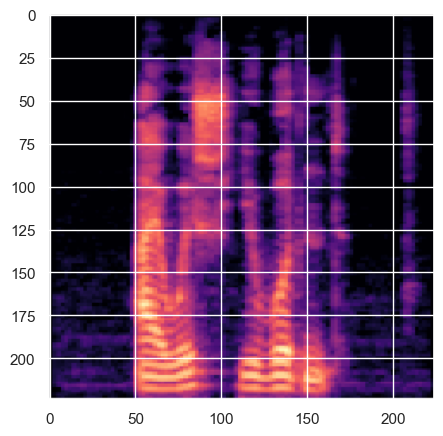

In [73]:
plt.imshow(images[100])
print(age[100])
print(gender[100])

In [74]:
np.save('images.npy', images)
np.save('age.npy', age)
np.save('gender.npy', gender)

In [76]:
images_f = np.load('images.npy')
age_f = np.load('age.npy')
gender_f = np.load('gender.npy')

In [77]:
images_f.shape

(1000, 224, 224, 3)

In [78]:
values,counts = np.unique(gender_f,return_counts=True)
print(counts)

[18099 54593]


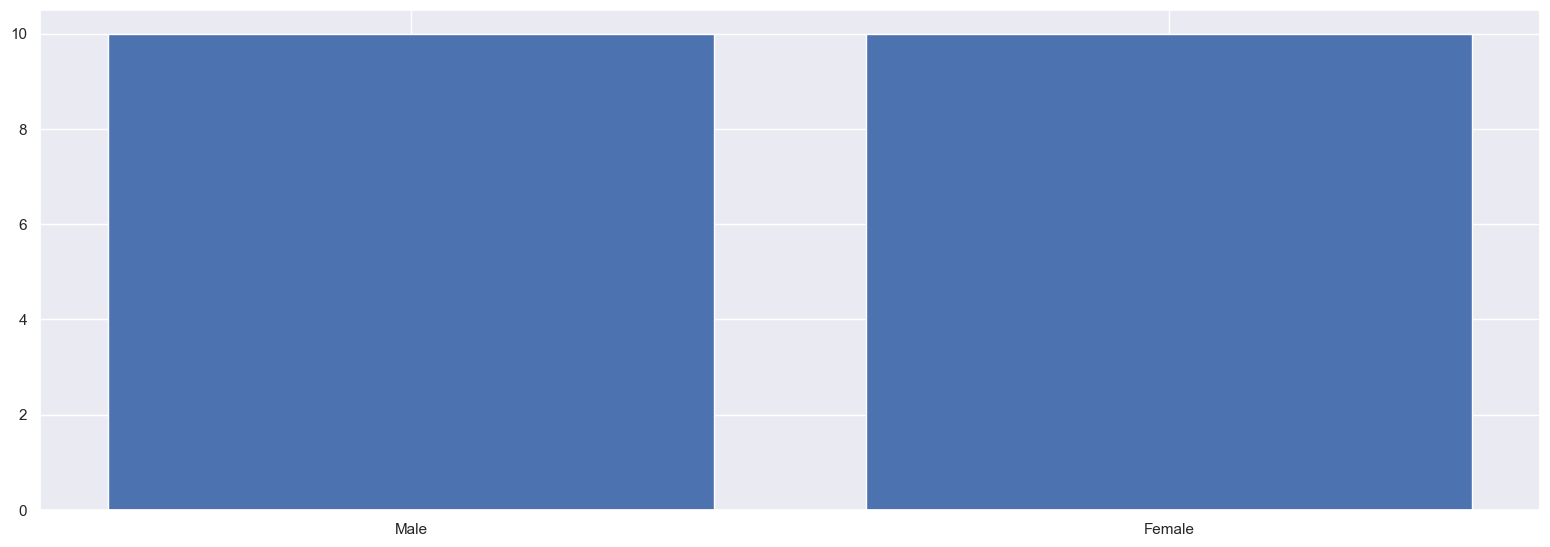

In [79]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender_1 = ['Male','Female']
values = [10,]
ax.bar(gender_1,values)
plt.show()

In [80]:
values,counts = np.unique(age_f,return_counts=True)
print(counts)

[ 5309 22449 18222 10871  9413  4557  1632   239]


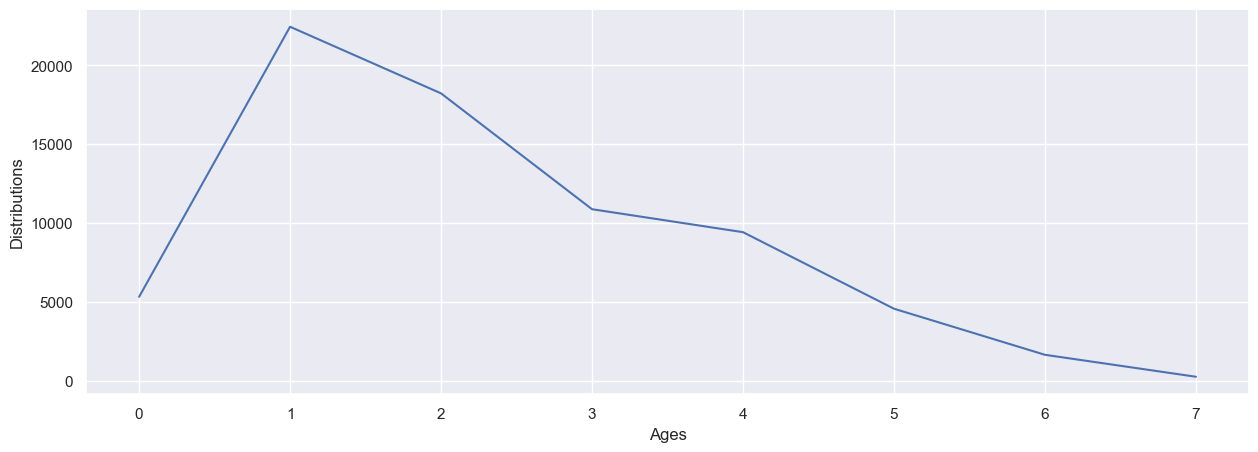

In [81]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distributions')
plt.show()

In [82]:
labels = []
i=0
while i<1000:
    label = []
    label.append(age[i])
    label.append(gender[i])
    labels.append(label)
    i=i+1

In [83]:
len(labels)

1000

In [84]:
images_f_2 = images_f/255

In [85]:
images_f_2.shape

(1000, 224, 224, 3)

In [86]:
labels_f = np.array(labels)

In [87]:
labels_f.shape

(1000, 2)

In [88]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [89]:
# again splitting y_test and y_train
y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [90]:
y_train_2

[array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [91]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [92]:
# Defining the model
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [93]:
def model (input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2 = Dense(1,activation='relu',name='age_out')(drop_2)
    model = Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=[['accuracy'],['accuracy']])
    return model

In [94]:
Model=model((224,224,3))

In [95]:
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 224, 224,  │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 224, 224,  │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 112, 112,  │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 112, 112,  │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 56, 56,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 28, 28,    │          0 │ conv2d_3[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 28, 28,    │          0 │ dropout_3[0][0]   │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 14, 14,    │          0 │ activation_3[0][

 Total params: 6,811,202 (25.98 MB)

 Trainable params: 6,811,202 (25.98 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [97]:
fle_s = 'Age_Sex_Emotion_Detectionn.keras'
checkpoint = ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [98]:
History = Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=100,callbacks=callback_list)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - age_out_accuracy: 0.0534 - age_out_loss: 2.5339 - loss: 3.4430 - sex_out_accuracy: 0.6971 - sex_out_loss: 0.6208
Epoch 1: val_loss improved from inf to 1.98869, saving model to Age_Sex_Emotion_Detectionn.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - age_out_accuracy: 0.0549 - age_out_loss: 2.5061 - loss: 3.4143 - sex_out_accuracy: 0.6997 - sex_out_loss: 0.6201 - val_age_out_accuracy: 0.0600 - val_age_out_loss: 1.1873 - val_loss: 1.9887 - val_sex_out_accuracy: 0.7600 - val_sex_out_loss: 0.5572
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - age_out_accuracy: 0.0760 - age_out_loss: 1.4407 - loss: 2.2378 - sex_out_accuracy: 0.7776 - sex_out_loss: 0.5646
Epoch 2: val_loss did not improve from 1.98869
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - age_out_accuracy: 0.0763 - age_out_loss: 1.4358 - loss: 2.2318 - sex_out_accuracy: 0.7771 - sex_out_loss: 0.5647 - val_age_out_accuracy: 0.0600 - val_age_out_loss: 1.2884 - val_loss: 2.0370 - val_

In [99]:
Model.evaluate(x_test,y_test_2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - age_out_accuracy: 0.0657 - age_out_loss: 1.1321 - loss: 1.4466 - sex_out_accuracy: 0.9227 - sex_out_loss: 0.2093


[1.4699528217315674,
 0.2257256954908371,
 1.1361161470413208,
 0.05999999865889549,
 0.9160000085830688]

In [100]:
pred = Model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step


In [101]:
pred[1]

array([[3.0045059],
       [2.4653554],
       [2.4448013],
       [2.4281223],
       [2.9646509],
       [2.3159034],
       [3.0028772],
       [2.2285833],
       [2.5611644],
       [2.2325501],
       [3.1008449],
       [2.5714498],
       [1.9757571],
       [3.2007108],
       [2.0519633],
       [1.932016 ],
       [2.8089156],
       [2.8901606],
       [2.932183 ],
       [2.4860039],
       [3.9559197],
       [3.7755527],
       [2.9147086],
       [3.3411636],
       [2.5532298],
       [3.0527682],
       [2.651238 ],
       [2.5350718],
       [3.0029316],
       [2.5566003],
       [2.5298624],
       [3.270234 ],
       [3.4515662],
       [2.3966324],
       [2.9510086],
       [3.0252273],
       [2.9723532],
       [2.5868301],
       [2.471413 ],
       [3.8341243],
       [2.5433192],
       [2.9661832],
       [2.767826 ],
       [2.8120713],
       [2.5388432],
       [2.3008142],
       [2.2736588],
       [3.6126144],
       [2.871138 ],
       [2.3095984],


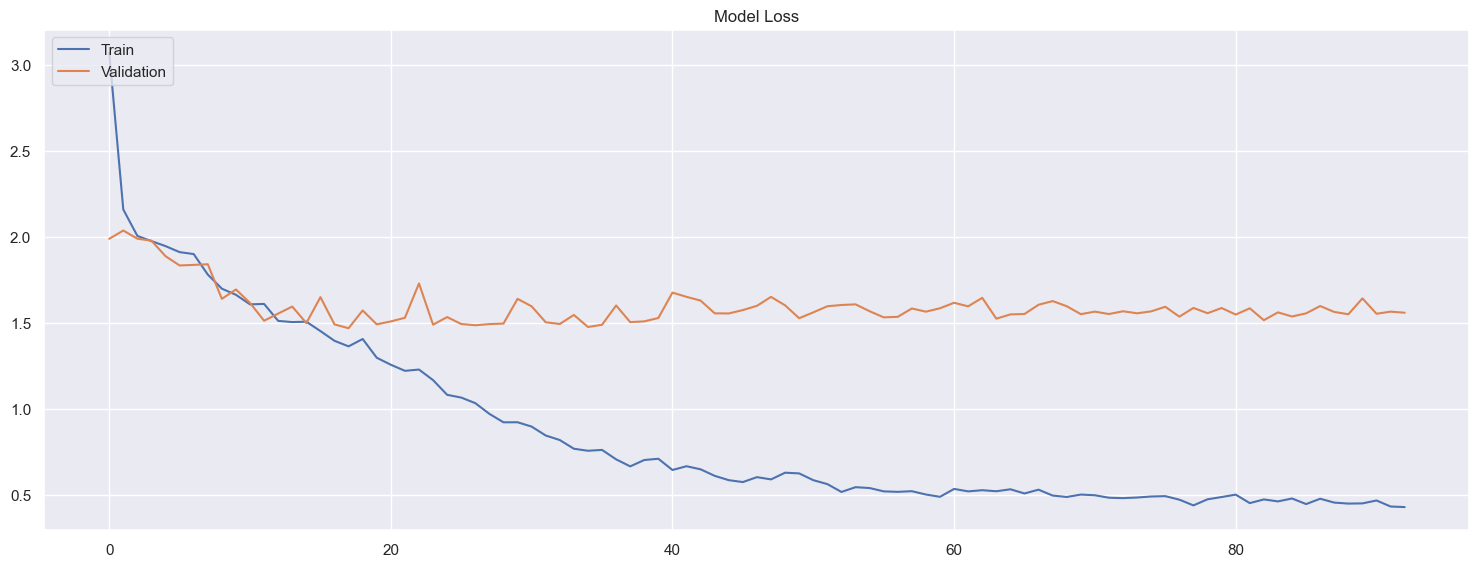

In [102]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

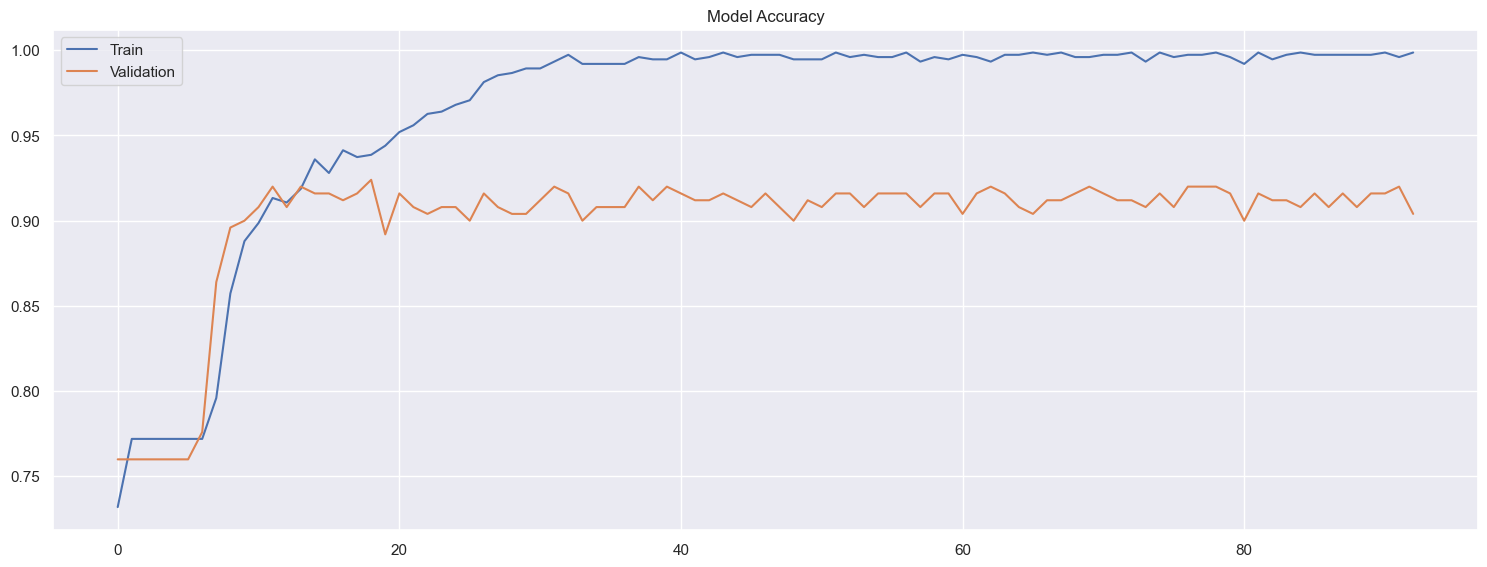

In [103]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

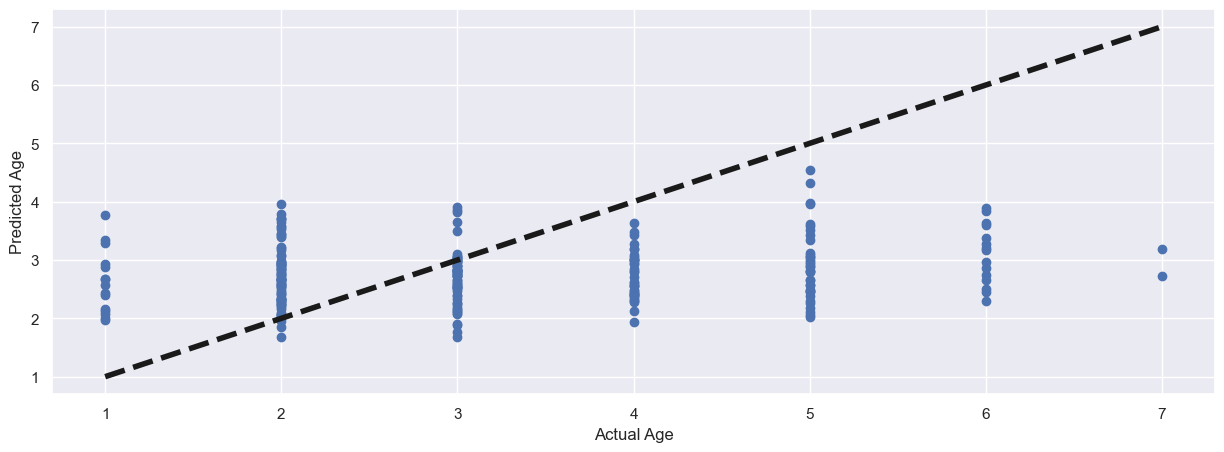

In [104]:
fig,ax = plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [105]:
i = 0
pred_l=[]
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [106]:
pred_l_array = np.array(pred_l)

In [107]:
type(pred_l_array)

numpy.ndarray

In [108]:
type(pred_l_array)

numpy.ndarray

In [109]:
y_test_2[0]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1.

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [112]:
report = classification_report(y_test_2[0],pred_l_array)

In [113]:
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83        60
         1.0       0.96      0.93      0.94       190

    accuracy                           0.92       250
   macro avg       0.88      0.90      0.89       250
weighted avg       0.92      0.92      0.92       250



In [114]:
results = confusion_matrix(y_test_2[0],pred_l)
results

array([[ 52,   8],
       [ 13, 177]], dtype=int64)

In [123]:
# Image testing
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print('Predicted Age is '+ str(age))
    print('Predicted Gender is '+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Age is 2
Predicted Gender is Female


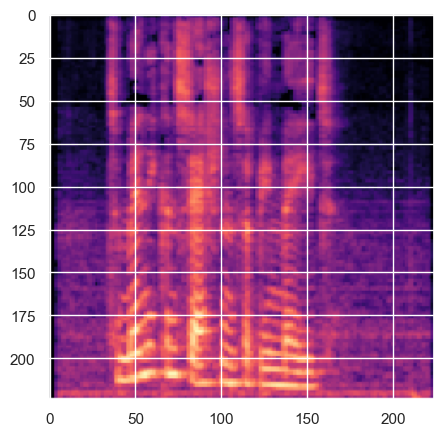

In [128]:

test_image(999,images_f,images_f_2,Model)